In [31]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

import statsmodels.stats.api as sms
from matplotlib import rcParams
import matplotlib.dates as mdates
import seaborn as sns
import folium
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
import geodatasets

In [3]:
#importing test file
df_test = pd.read_csv('test_results.csv')
df_test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [4]:
#improting user file
df_user = pd.read_csv('user_table.csv')
df_user.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [5]:
#checking for missing data and converting timestamp to datetime
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'], errors='coerce')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           316800 non-null  int64         
 1   timestamp         311620 non-null  datetime64[ns]
 2   source            316800 non-null  object        
 3   device            316800 non-null  object        
 4   operative_system  316800 non-null  object        
 5   test              316800 non-null  int64         
 6   price             316800 non-null  int64         
 7   converted         316800 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 19.3+ MB


In [6]:
#checking for missing info
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  275616 non-null  int64  
 1   city     275616 non-null  object 
 2   country  275616 non-null  object 
 3   lat      275616 non-null  float64
 4   long     275616 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [7]:
#join the two datasets on user_id
df=pd.merge(left=df_test, right=df_user, how='left', on='user_id')
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           316800 non-null  int64         
 1   timestamp         311620 non-null  datetime64[ns]
 2   source            316800 non-null  object        
 3   device            316800 non-null  object        
 4   operative_system  316800 non-null  object        
 5   test              316800 non-null  int64         
 6   price             316800 non-null  int64         
 7   converted         316800 non-null  int64         
 8   city              275616 non-null  object        
 9   country           275616 non-null  object        
 10  lat               275616 non-null  float64       
 11  long              275616 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 29.0+ MB


In [9]:
#looking at percentages for missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing)

                  Total   Percent
city              41184  0.130000
country           41184  0.130000
lat               41184  0.130000
long              41184  0.130000
timestamp          5180  0.016351
device                0  0.000000
user_id               0  0.000000
source                0  0.000000
converted             0  0.000000
price                 0  0.000000
test                  0  0.000000
operative_system      0  0.000000


The user dataframe did not appear to have any missing data before the merge and the test dataframe seemed to have some missing timestamps. There are still missing timestamps but now also some locations missing as well. This probably means that there were some users in the test dataframe that weren't in the location dataframe, which makes sense because the test dataframe has more enteries. The amount of missing data is miniscular and does not need to be addressed and they can simply be removed. 

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271113 entries, 0 to 316799
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           271113 non-null  int64         
 1   timestamp         271113 non-null  datetime64[ns]
 2   source            271113 non-null  object        
 3   device            271113 non-null  object        
 4   operative_system  271113 non-null  object        
 5   test              271113 non-null  int64         
 6   price             271113 non-null  int64         
 7   converted         271113 non-null  int64         
 8   city              271113 non-null  object        
 9   country           271113 non-null  object        
 10  lat               271113 non-null  float64       
 11  long              271113 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 26.9+ MB


In [12]:
#creating a copy for future coding
df2 = df.copy()

In [13]:
#checking to make sure the prices have been assigned correctly
print(df[['user_id','test','price']].groupby(['test','price']).count())

            user_id
test price         
0    39      173316
     59         186
1    39         133
     59       97478


In [14]:
#removing the very few ones that are incorrectly labeled
df=df[((df['test']==0) & (df['price']==39)) | ((df['test']==1) & (df['price']==59))]
print(df[['user_id','test','price']].groupby(['test','price']).count())

            user_id
test price         
0    39      173316
1    59       97478


In [15]:
#checking out the mean and std for the new revenue column 
df['revenue'] = df['converted'] * df['price']
df['revenue'].describe()

count    270794.000000
mean          0.821318
std           6.156816
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          59.000000
Name: revenue, dtype: float64

In [37]:
#getting the map
map = folium.Map(location=[df.lat.mean(), df.long.mean()], zoom_start=34, control_scale=True)

In [40]:
#mapping the data
for index, location in df.iterrows():
    folium.Marker([location["lat"], location["long"]], popup=location["city"]).add_to(map)

#rendering the map
map

#rendering the map
map

#rendering the map
map

In [16]:

# Create a map centered at the first location (using the first entry in your DataFrame)
my_map = folium.Map(location=[df.loc[0, "lat"], df.loc[0, "long"]], zoom_start=12)


In [17]:
# Add markers for each location in the DataFrame
for index, location in df.iterrows():
    folium.Marker([location["lat"], location["long"]], popup=location["city"]).add_to(my_map)



# Display the map (if you're in a Jupyter notebook)
my_map

In [34]:
# Convert the data into a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']))


In [135]:
print(df[['converted','test', 'price']].groupby('test').mean())

      converted  price
test                  
0      0.019808   39.0
1      0.015389   59.0


conversion rate dropped

In [136]:
#revenue per user
print(df[['revenue','test']].groupby('test').mean())

       revenue
test          
0     0.772531
1     0.907967


In [137]:
#Check avg revenue per user
print(ttest_ind(df[df['test']==1]['revenue'], df[df['test']==0]['revenue'], equal_var=False))

Ttest_indResult(statistic=5.036120173625572, pvalue=4.755866983759273e-07)


#Check avg revenue per user
result = ttest_ind(df[df['test']==1]['revenue'], df[df['test']==0]['revenue'], equal_var=False)

print(f"t-statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'ads_facebook'),
  Text(1, 0, 'seo-google'),
  Text(2, 0, 'ads-bing'),
  Text(3, 0, 'direct_traffic'),
  Text(4, 0, 'ads-google'),
  Text(5, 0, 'friend_referral'),
  Text(6, 0, 'ads_other'),
  Text(7, 0, 'ads-yahoo'),
  Text(8, 0, 'seo-yahoo'),
  Text(9, 0, 'seo_facebook'),
  Text(10, 0, 'seo-bing'),
  Text(11, 0, 'seo-other')])

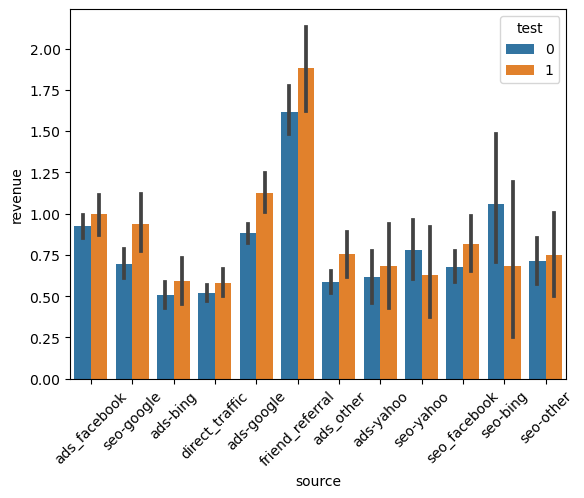

In [138]:
sns.barplot(x='source', y='revenue', hue='test', data=df)
plt.xticks(rotation=45)


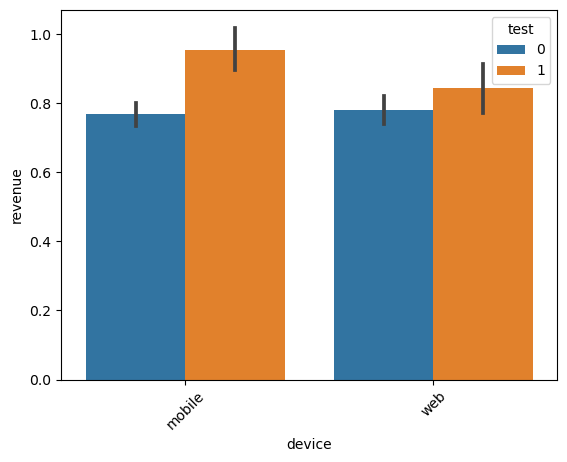

In [139]:
sns.barplot(x='device', y='revenue', hue='test', data=df)
plt.xticks(rotation=45)
plt.show()

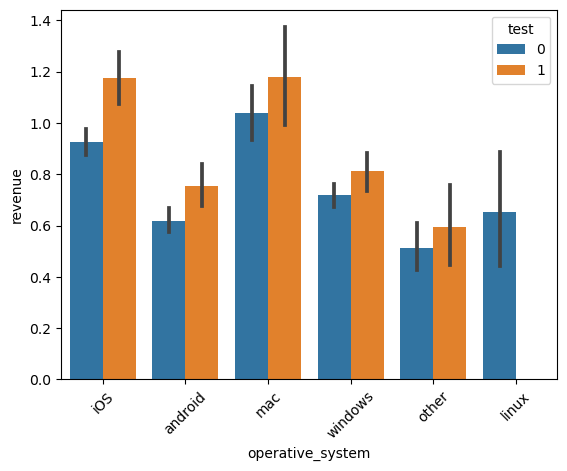

In [140]:
sns.barplot(x='operative_system', y='revenue', hue='test', data=df)
plt.xticks(rotation=45)
plt.show()

In [141]:
#Firstly, how many users are we talking about?
print(df.query('operative_system==\'linux\'').shape[0]/df.shape[0])

0.013155968056228247


In [142]:
data = df.query('operative_system!=\'linux\'')
print(data[['revenue','test']].groupby('test').mean())

       revenue
test          
0     0.773832
1     0.923909


In [143]:
print(ttest_ind(df.query('test==1')['revenue'], df.query('test==0')['revenue'], equal_var=False))

Ttest_indResult(statistic=5.036120173625572, pvalue=4.755866983759273e-07)


In [144]:
top_cities=df['city'].value_counts().reset_index().sort_values('city', ascending=False).head(10)
print(top_cities)

          index   city
0      New York  24920
1       Chicago   6877
2       Houston   6472
3   San Antonio   4481
4   Los Angeles   4026
5      San Jose   3258
6  Indianapolis   3109
7  Jacksonville   2823
8  Philadelphia   2461
9     Las Vegas   2342

<AxesSubplot:title={'center':'Average Revenue for the Top Ten Cities'}, xlabel='city', ylabel='revenue'>

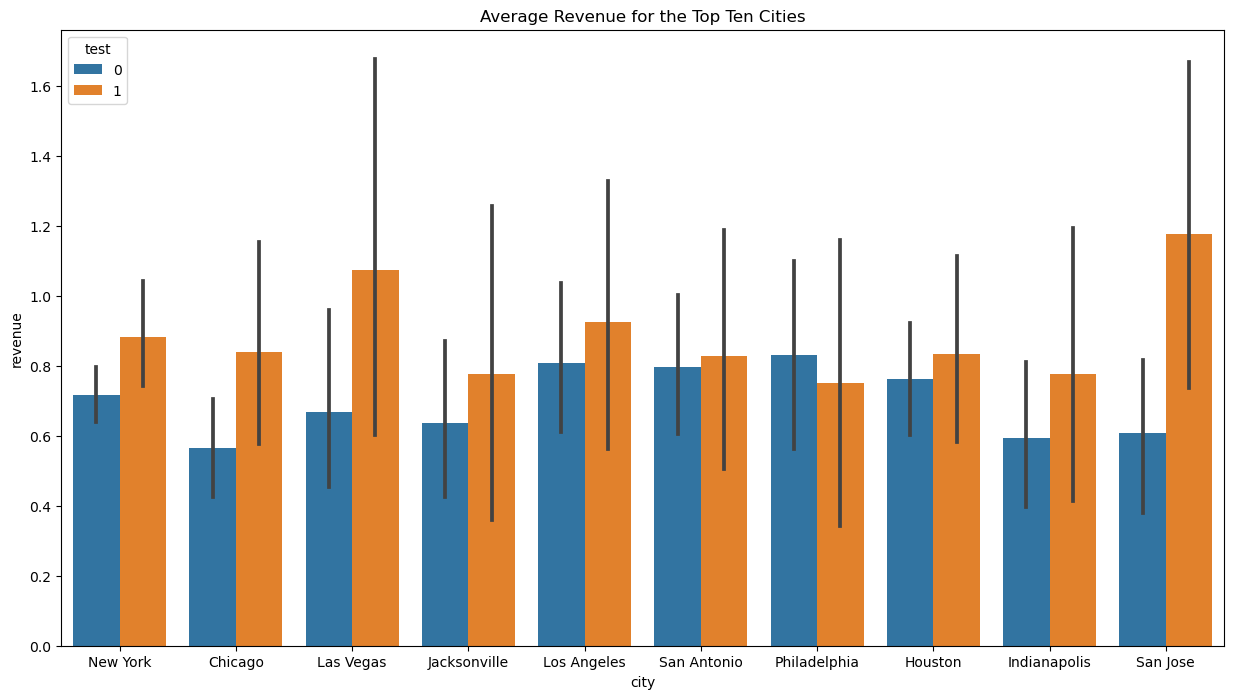

In [150]:
#plot avg revenue for top 10 cities
plt.figure(figsize=(15,8))
plt.title("Average Revenue for the Top Ten Cities")
sns.barplot(x='city', y='revenue', hue='test', data=df[df['city'].isin(top_cities['index'])])

In [146]:
conversion_rate_control = df_test.query('test==0').converted.mean()
p1_and_p2 = sms.proportion_effectsize(conversion_rate_control, conversion_rate_control*39/59)
sample_size = round(sms.NormalIndPower().solve_power(p1_and_p2, power=0.8, alpha=0.05))
print("The required sample size per group is ~", sample_size)

The required sample size per group is ~ 5548


In [147]:
#create a column that's week of the year
df_test['week_year'] = pd.to_datetime(df_test.timestamp.str.split(' ').str[0]).dt.strftime('%W')
#take avg count of users per week. We remove first and last week, just in case they don't include all 7 days
users_week = df_test['week_year'].value_counts().sort_index()
users_week = users_week.drop(users_week.index[[0,(users_week.shape[0]-1)]]).mean()
  
print("Avg number of users per week is:", round(users_week))

AttributeError: Can only use .str accessor with string values!

In [ ]:
print("The percentage of traffic that needs to be in test is", round(sample_size/(users_week*2)*100))

NameError: name 'users_week' is not defined

In [ ]:
#creating a month column
df_test['month'] = df_test['timestamp'].dt.month_name()

In [10]:
#creating a year column
df_test['year'] = df_test['timestamp'].dt.year

In [11]:
#creating a day column and checking the name dataframe
df_test['day'] = df_test['timestamp'].dt.day_name()
df_test.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,month,year,day
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,May,2015.0,Friday
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,May,2015.0,Sunday
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,April,2015.0,Saturday
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,May,2015.0,Thursday
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,May,2015.0,Sunday


In [18]:
#chekcing for duplicate users
df_test['user_id'].duplicated().value_counts()

False    316800
Name: user_id, dtype: int64

In [19]:
#chekcing for duplicate users
df_user['user_id'].duplicated().value_counts()

False    275616
Name: user_id, dtype: int64

In [ ]:
#mean and std of data
df_test.describe()

,user_id,test,price,converted,year
count,316800.000000,316800.000000,316800.000000,316800.000000,306529.0
mean,499281.341840,0.360079,46.205051,0.018333,2015.0
std,288591.154044,0.480024,9.601487,0.134154,0.0
min,3.000000,0.000000,39.000000,0.000000,2015.0
25%,249525.750000,0.000000,39.000000,0.000000,2015.0
50%,499021.500000,0.000000,39.000000,0.000000,2015.0
75%,749025.500000,1.000000,59.000000,0.000000,2015.0
max,1000000.000000,1.000000,59.000000,1.000000,2015.0


In [ ]:
#mean and std of data
df_user.describe()

,user_id,lat,long
count,275616.000000,275616.000000,275616.000000
mean,499245.801521,37.111680,-93.981772
std,288533.458944,5.209627,18.086486
min,3.000000,19.700000,-157.800000
25%,249544.500000,33.660000,-112.200000
50%,498861.000000,37.740000,-88.930000
75%,748856.500000,40.700000,-78.910000
max,999999.000000,61.180000,30.310000


In [23]:
#Group by source and month
testing = df_test.groupby(['source', 'month'])['price'].sum().unstack(level=-1).fillna(0)
testing

month,April,March,May
source,,,
ads-bing,322180,324654,378145
ads-google,858324,845990,953169
ads-yahoo,107876,113320,115851
ads_facebook,781006,755223,851298
ads_other,427986,427789,480318
direct_traffic,852420,871078,973832
friend_referral,300794,292061,334523
seo-bing,30357,32404,34202
seo-google,333789,323857,374261


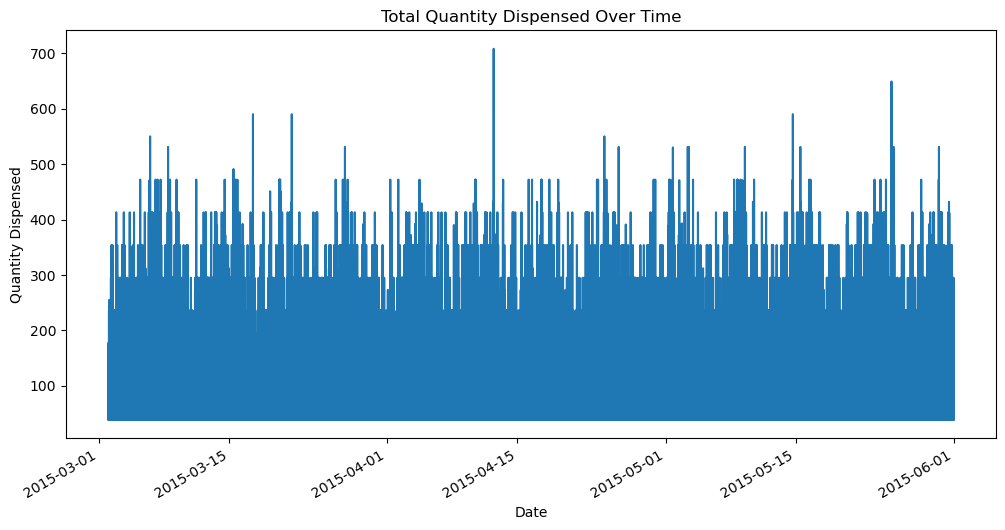

In [25]:
plt.figure(figsize=(12, 6))
df_test.groupby('timestamp')['price'].sum().plot()
plt.title('Total Quantity Dispensed Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Dispensed')
plt.show()